# ANÁLSIS DE DISCURSO DE CANDIDATOS A LA PRESIDENCIA DE COLOMBIA
## Técnica Análisis de sentimientos

# Librerias

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
import tweepy
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
from textblob import TextBlob
import plotly.express as px
import re

In [4]:
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
AK = 'vS4oxRBGzr9ntxvAHBaHixeZO' #API_Key

AKS = 'YoMXdRTcPKjkRDVyRTC98Pqk1tGmwMYEbLlaaNc69HlylC0nXA' #API_Key_Secret

#Bearer_Token
BT = 'AAAAAAAAAAAAAAAAAAAAAL9DcQEAAAAAB4CguoAnqFHIO%2BN9GMXs98eY060%3DjxULVQTw1spgN9vaDj0Wj4PbpfT6NaEA30yJezenApwNmnsNxn'

AT = '1260182604-NAPUUvlONFc4KhpRkDLebb6DMlEcMc4qoCdI2QF' #Access_Token

ATS = 'CBIf22jBx6E7azRLj3MEJ1adsB7jd6NC0RobOuTd0NiFU' #Access_Token_Secret

In [6]:
auth = tweepy.OAuthHandler(AK, AKS)
auth.set_access_token(AT, ATS)

In [7]:
api = tweepy.API(auth, wait_on_rate_limit = True)

# Función Web Scraping cuentas de twitter de los candidatos.

In [8]:
def data(candi, items=1):
 
    df = pd.DataFrame(columns = ['candidato', 'fecha', 'tuit', 'likes', 'rt'])

    fecha = []
    texto = []
    likes = []
    rts = []
    candidato = []
    
    for tweet in tweepy.Cursor(api.user_timeline, screen_name = candi, tweet_mode = 'extended').items(items):
        candidato.append(candi)
        fecha.append(tweet._json['created_at']) 
        texto.append(tweet._json['full_text'])
        likes.append(tweet._json['favorite_count'])
        rts.append(tweet._json['retweet_count'])
 
    df['candidato'] = candidato
    df['fecha'] = fecha
    df['tuit'] = texto
    df['likes'] = likes
    df['rt'] = rts
    df['fecha'] = pd.to_datetime(df['fecha'], infer_datetime_format=True)
    df['fecha_ano'] = df['fecha'].dt.year.astype('string')
    df['fecha_mes'] = df['fecha'].dt.month_name()
    df['fecha_dia'] = df['fecha'].dt.day.astype('string')
    df['mes_dia'] = df['fecha_dia'].str.cat(df['fecha_mes'],sep="/")
    df['mes_ano'] = df['fecha_mes'].str.cat(df['fecha_ano'],sep="/")
    df['d_m_a'] = df['mes_dia'].str.cat(df['fecha_ano'],sep="/")
    
    return(df)
    

# Función para excluir del texto caracteres especiales

In [13]:
from unicodedata import normalize

def formatingText(text):
    text = text.lower()
    text = re.sub('<.*?>', ' ', text)
    text = re.sub(':.*?:', ' ', text)
    text = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", text), 0, re.I)
    text = normalize( 'NFC', text)
    text = re.sub('[^a-z ]', ' ', text)
    return text

In [14]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)

    return text

# CANDIDATOS

# Gustavo Petro

In [10]:
GP = data('petrogustavo', 1000)
GP.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1  RT @petrogustavo: Un camino por la vida https:...      0  2216      2022   
2  RT @PatriciaUribe07: Esta noche en  @NoticiasU...      0   590      2022   
3      Un camino por la vida https://t.co/3iWYRbzUVH   5744  2216      2022   
4  RT @PetroValleC: #Caravana 🚗🚲🛵 así vivimos la ...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         8   8/May  May/2022  8/May/2022  
4       May         8   8/May  May/2022  8/May/2022

In [127]:
data_GP = ' '.join(item for item in GP.tuit)
#data_GP

In [128]:
words = word_tokenize(clean_text(data_GP)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [73]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'petro', 'Petro', 'petropresidente']
words = [w for w in words if not w in no_words and w.isalpha()]

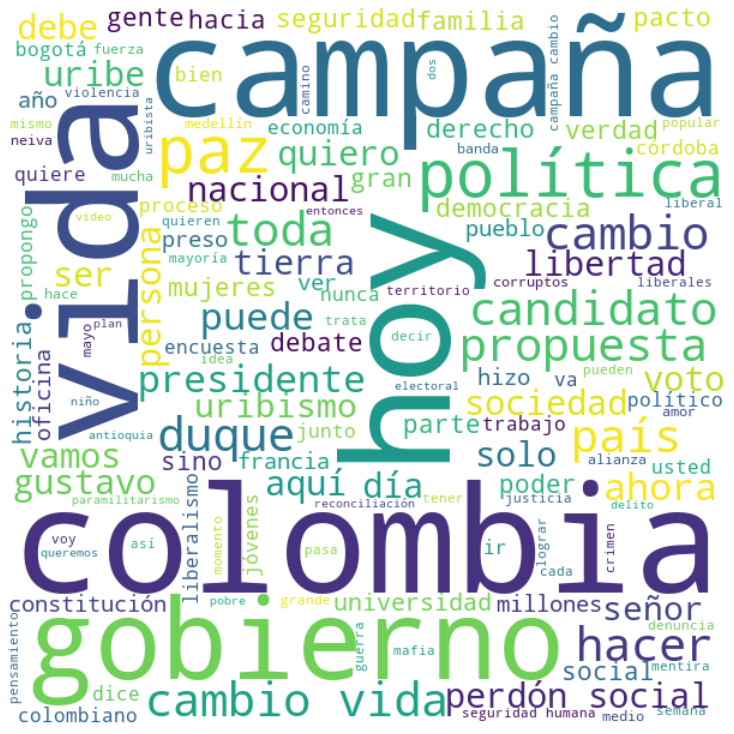

In [74]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Fico Gutierrez

In [20]:
FG = data('FicoGutierrez', 1000)
FG.head(5)

candidato                     fecha  \
0  FicoGutierrez 2022-05-09 11:58:33+00:00   
1  FicoGutierrez 2022-05-09 11:58:25+00:00   
2  FicoGutierrez 2022-05-09 11:45:01+00:00   
3  FicoGutierrez 2022-05-09 11:33:58+00:00   
4  FicoGutierrez 2022-05-09 02:48:13+00:00   

                                                tuit  likes    rt fecha_ano  \
0  RT @lcvelez: "El quemar es lo de ellos. Quemar...      0   272      2022   
1  RT @lcvelez: "El video es muy claro. Yo me sol...      0    78      2022   
2  RT @lcvelez: A esta hora Federico Gutiérrez, c...      0   227      2022   
3  Dos miembros de la comunidad indígena Nukak no...    710   258      2022   
4  Yo no me creo un salvador, no sufro de superio...   8174  2413      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         9   9/May  May/2022  9/May/2022  
4       May         9   9/May  May/2022  9/May/2022

In [129]:
data_FG = ' '.join(item for item in FG.tuit)
#data_FG

In [130]:
words = word_tokenize(clean_text(data_FG)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [77]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
            'forolr', 'Fico', 'fico', 'FicoGutierrez', 'ficopresidente']
words = [w for w in words if not w in no_words and w.isalpha()]

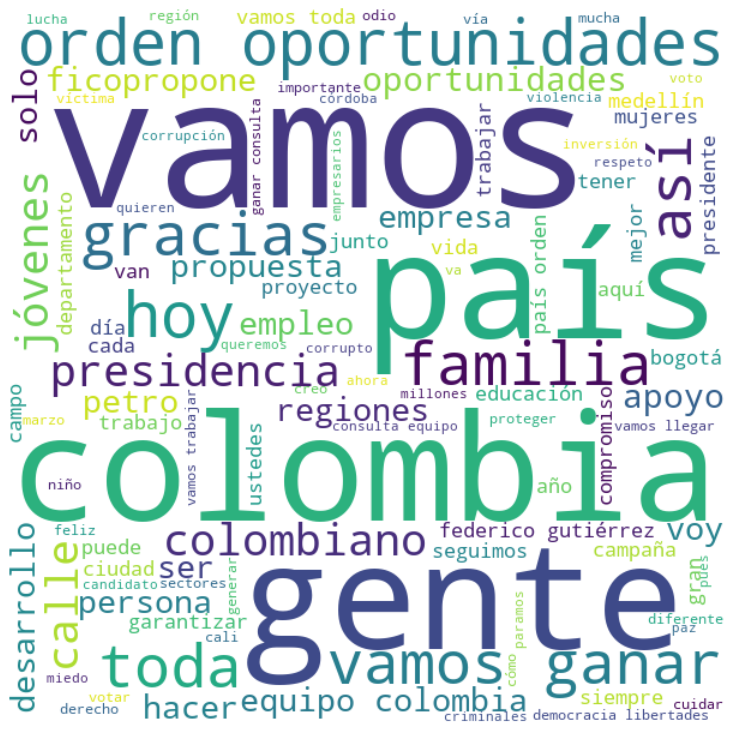

In [78]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Rodolfo Hernández

In [25]:
RH = data('ingrodolfohdez', 1000)
RH.head(5)

candidato                     fecha  \
0  ingrodolfohdez 2022-05-09 12:28:35+00:00   
1  ingrodolfohdez 2022-05-09 12:01:42+00:00   
2  ingrodolfohdez 2022-05-09 11:58:45+00:00   
3  ingrodolfohdez 2022-05-09 10:38:44+00:00   
4  ingrodolfohdez 2022-05-09 10:22:30+00:00   

                                                tuit  likes   rt fecha_ano  \
0  RT @NoticiasCaracol: “Yo me reafirmo. Desde el...      0  103      2022   
1    #CampañaSuciaEs inflar candidatos en encuestas.    285   39      2022   
2  Ojalá encuentren a alguien que los mire como m...   1930  126      2022   
3  Buenos días. Para que no olviden: en segunda v...   1452  140      2022   
4  Carolina, mil gracias por su apoyo 🫶🏼 https://...     52    8      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         9   9/May  May/2022  9/May/2022  
4       May         9   9/May  May/2022  9/May/2022

In [131]:
data_RH = ' '.join(item for item in RH.tuit)
#data_RH

In [132]:
words = word_tokenize(clean_text(data_RH)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [82]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'rodolfopresidente', 'rodolfohernandez', 'ligaanticorrupcion', 'rodolfo hernández', 'ingrodolfo','hable ingeniero',
           'ingeniero', 'rodolfo', 'hernández']
words = [w for w in words if not w in no_words and w.isalpha()]

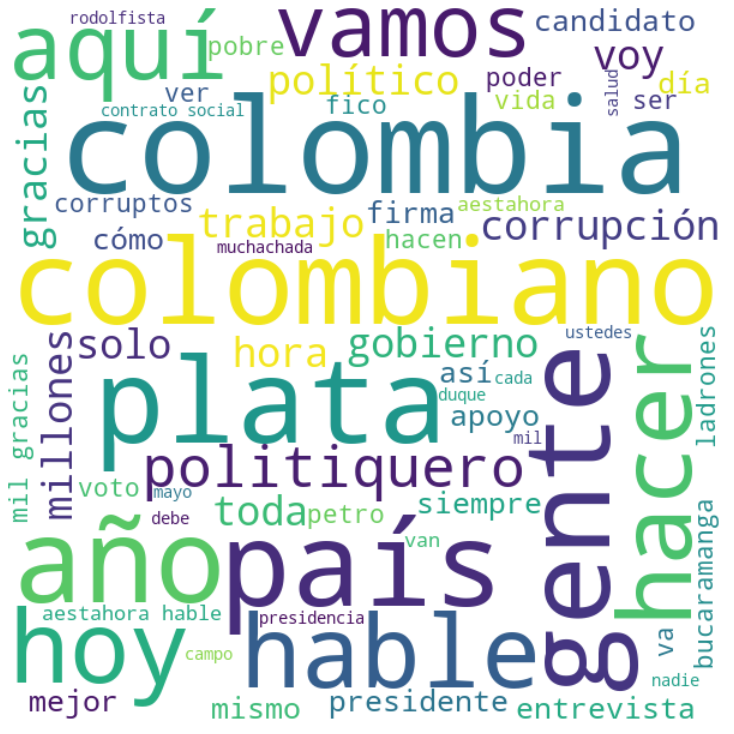

In [83]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Sergio Fajardo

In [30]:
SF = data('sergio_fajardo', 1000)
SF.head(5)

candidato                     fecha  \
0  sergio_fajardo 2022-05-09 09:16:20+00:00   
1  sergio_fajardo 2022-05-09 03:17:14+00:00   
2  sergio_fajardo 2022-05-09 03:05:40+00:00   
3  sergio_fajardo 2022-05-09 03:01:50+00:00   
4  sergio_fajardo 2022-05-09 02:14:56+00:00   

                                                tuit  likes    rt fecha_ano  \
0  RT @Eganbernal: Primera vez en pedales. \nAcá ...      0  1411      2022   
1  COHERENCIA + CONSISTENCIA = CONFIANZA. Lo que ...   1183   310      2022   
2  @mcarvajal28 Gracias Marcela por conocer nuest...    119    22      2022   
3  RT @mcarvajal28: @sergio_fajardo es el que más...      0   153      2022   
4  RT @jccardenas1965: Del debate ambiental de @N...      0    53      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         9   9/May  May/2022  9/May/2022  
4       May         9   9/May  May/2022  9/May/2022

In [133]:
data_SF = ' '.join(item for item in SF.tuit)
#data_SF

In [134]:
words = word_tokenize(clean_text(data_SF)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [91]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'lavueltacaribe', 'remontada', 'fajardo', 'fajardopresidente', 'unidasconfajardo', 'cambiemosconfajardo']
words = [w for w in words if not w in no_words and w.isalpha()]

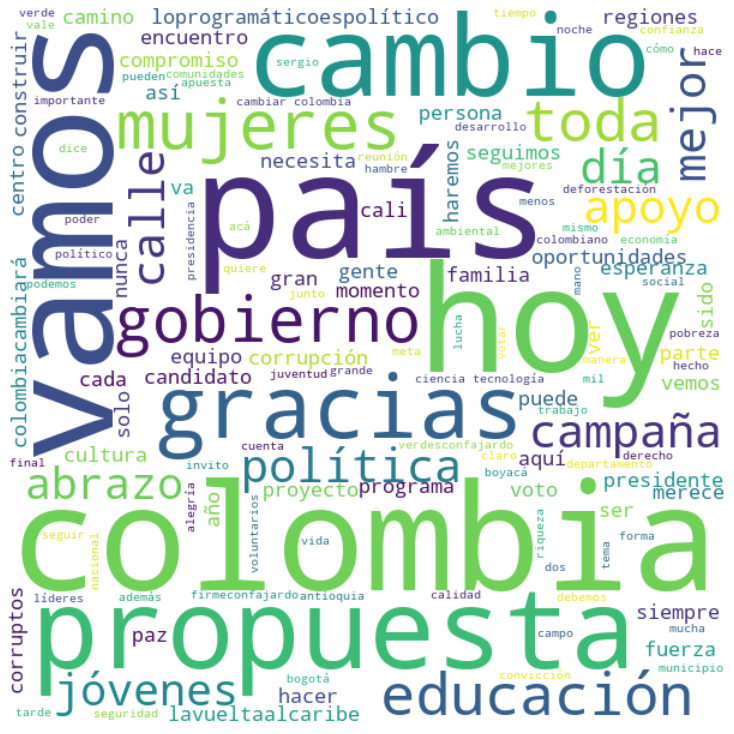

In [92]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Ingrid Betancourt

In [35]:
IB = data('IBetancourtCol', 1000)
IB.head(5)

candidato                     fecha  \
0  IBetancourtCol 2022-05-09 03:07:14+00:00   
1  IBetancourtCol 2022-05-07 22:18:45+00:00   
2  IBetancourtCol 2022-05-06 11:27:56+00:00   
3  IBetancourtCol 2022-05-06 01:55:58+00:00   
4  IBetancourtCol 2022-05-05 22:02:28+00:00   

                                                tuit  likes  rt fecha_ano  \
0  RT @AlvaroGarciaJ: A las 7:30 p.m. estaremos #...      0   3      2022   
1  RT @RTVCco: ¡#ColombiaMiElección y la de todos...      0   7      2022   
2  La eliminación de la ley de garantías fue una ...     63  16      2022   
3  Estamos frente a maniobras con apariencia de l...     39  15      2022   
4  En debate con @urosario\n\nNuestra prioridad f...     34   5      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         7   7/May  May/2022  7/May/2022  
2       May         6   6/May  May/2022  6/May/2022  
3       May         6   6/May  May/2022  6/May/2022  
4       May         5   5/May  May/2022  5/May/2022

In [135]:
data_IB = ' '.join(item for item in IB.tuit)
#data_IB

In [136]:
words = word_tokenize(clean_text(data_IB)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [96]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'ingrid', 'betancourt', 'ingridpresidenta', 'elexternadodebate', 'jaquealacorrupcion']
words = [w for w in words if not w in no_words and w.isalpha()]

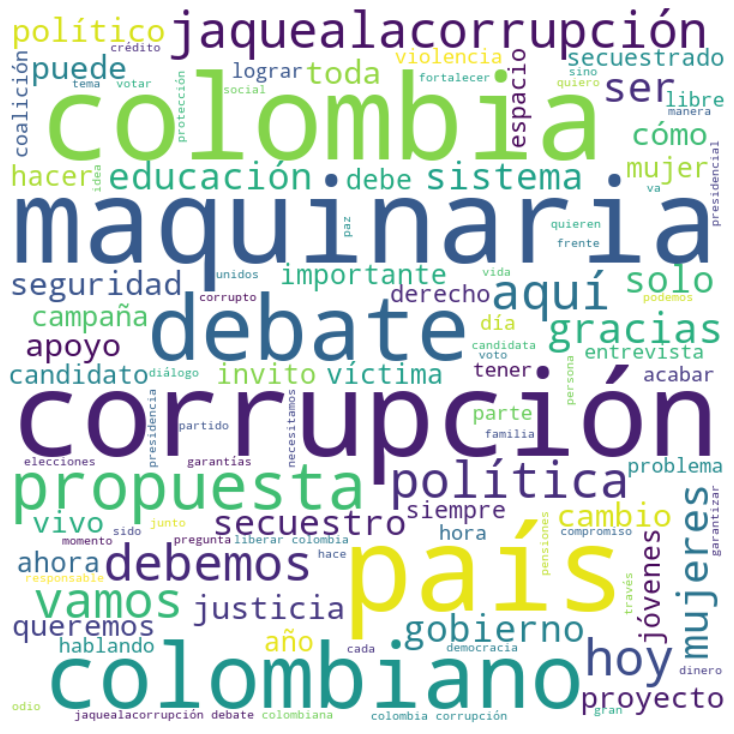

In [97]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Enrique Gómez

In [40]:
EG = data('Enrique_GomezM', 1000)
EG.head(5)

candidato                     fecha  \
0  Enrique_GomezM 2022-05-08 19:52:00+00:00   
1  Enrique_GomezM 2022-05-08 16:35:43+00:00   
2  Enrique_GomezM 2022-05-08 15:47:24+00:00   
3  Enrique_GomezM 2022-05-08 12:23:08+00:00   
4  Enrique_GomezM 2022-05-07 20:27:06+00:00   

                                                tuit  likes    rt fecha_ano  \
0                                 @SectorPrdctvo 103      0     0      2022   
1  Hoy celebramos el #DíaDeLaMadre y también conm...    536   180      2022   
2  RT @MovSalvacionNal: El socialismo miente, dis...      0  3275      2022   
3  Si hemos sido y hemos podido es por ustedes. S...    191    57      2022   
4                                 @PaulinaSofiaTO ☺️      3     0      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         8   8/May  May/2022  8/May/2022  
1       May         8   8/May  May/2022  8/May/2022  
2       May         8   8/May  May/2022  8/May/2022  
3       May         8   8/May  May/2022  8/May/2022  
4       May         7   7/May  May/2022  7/May/2022

In [137]:
data_EG = ' '.join(item for item in EG.tuit)
#data_EG

In [138]:
words = word_tokenize(clean_text(data_EG)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [109]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'salvacion nacional', 'salvacion', 'nacional', 'salvación', 'eldebatepacifico', 'enrique gomez', 'enrique', 'gomez',
           'gómez', 'enrique gómez', 'eldebatedelpacífico']
words = [w for w in words if not w in no_words and w.isalpha()]

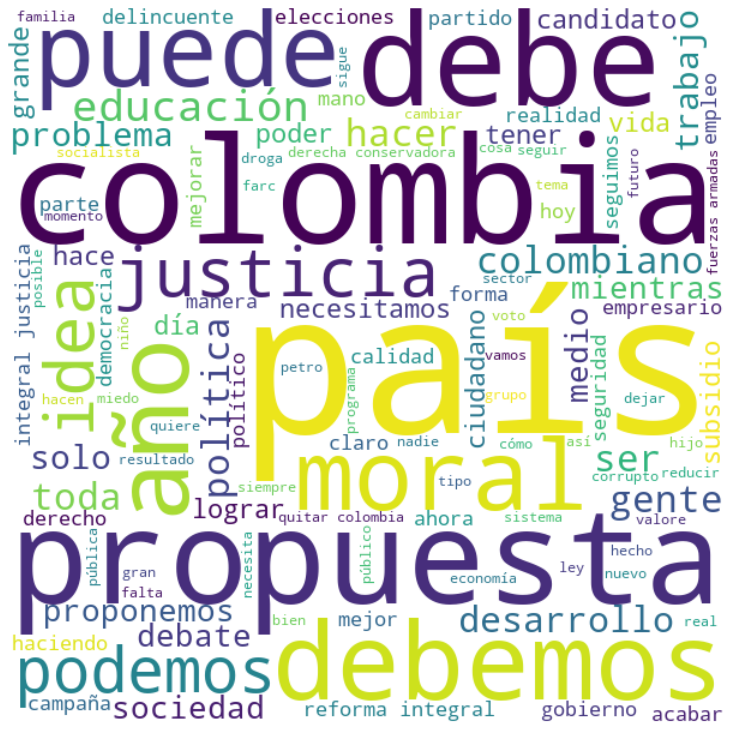

In [110]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Jhon Milton Rodriguez

In [46]:
JM = data('JohnMiltonR_', 1000)
JM.head(5)

candidato                     fecha  \
0  JohnMiltonR_ 2022-05-09 12:54:49+00:00   
1  JohnMiltonR_ 2022-05-09 03:21:14+00:00   
2  JohnMiltonR_ 2022-05-09 03:20:47+00:00   
3  JohnMiltonR_ 2022-05-09 03:20:30+00:00   
4  JohnMiltonR_ 2022-05-09 03:09:51+00:00   

                                                tuit  likes  rt fecha_ano  \
0  RT @CaracolRadio: #ElGranReto | "Las encuestan...      0   1      2022   
1  RT @berneos: @jDavidGutierrez @JohnMiltonR_ ht...      0  13      2022   
2  RT @SolmaSaumeth: @lasillavacia El que defiend...      0   7      2022   
3  RT @nina2408: @lasillavacia Eso no es cierto. ...      0   4      2022   
4  RT @darytob: Si si si. El es mi candidato. Sus...      0   8      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         9   9/May  May/2022  9/May/2022  
4       May         9   9/May  May/2022  9/May/2022

In [139]:
data_JM = ' '.join(item for item in JM.tuit)
#data_JM

In [140]:
words = word_tokenize(clean_text(data_JM)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [118]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'john', 'milton', 'rodriguez', 'rodríguez', 'john milton', 'johnmiltonpresidenteva', 'johnmiltonpresidente', 'envivo',
           'alaire', 'forolr']
words = [w for w in words if not w in no_words and w.isalpha()]

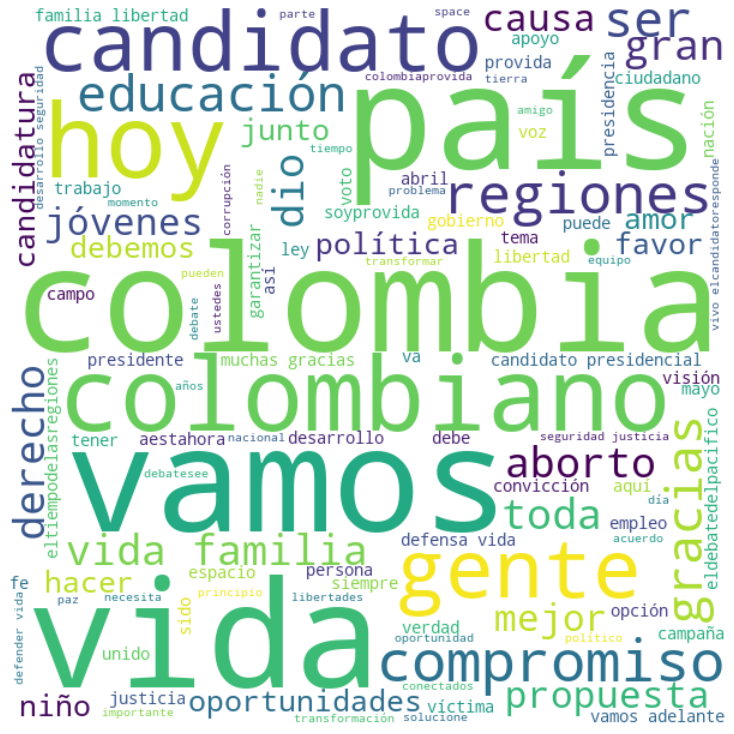

In [119]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Luis Perez

In [51]:
LUPE = data('Luis_Perez_G', 1000)
LUPE.head(5)

candidato                     fecha  \
0  Luis_Perez_G 2022-05-06 17:41:33+00:00   
1  Luis_Perez_G 2022-05-06 17:22:28+00:00   
2  Luis_Perez_G 2022-05-06 17:01:51+00:00   
3  Luis_Perez_G 2022-05-04 14:21:30+00:00   
4  Luis_Perez_G 2022-05-04 14:21:30+00:00   

                                                tuit  likes  rt fecha_ano  \
0  El gobierno frente al paro armado del Clan del...     20   4      2022   
1  El clan del golfo tiene en jaque a 9 departame...     33   9      2022   
2  El gobierno frente al paro armado del Clan del...      5   2      2022   
3  Las sociedades enfermas matan a sus mejores di...      9   2      2022   
4  Estremecedora la amenaza de muerte a @petrogus...     33   5      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         6   6/May  May/2022  6/May/2022  
1       May         6   6/May  May/2022  6/May/2022  
2       May         6   6/May  May/2022  6/May/2022  
3       May         4   4/May  May/2022  4/May/2022  
4       May         4   4/May  May/2022  4/May/2022

In [141]:
data_LUPE = ' '.join(item for item in LUPE.tuit)
#data_LUPE

In [142]:
words = word_tokenize(clean_text(data_LUPE)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [125]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'luis', 'perez', 'pérez', 'luis perez', 'luis pérez', 'luispérezpresidente', 'cumplelapalabra', 'piensaengrande']
words = [w for w in words if not w in no_words and w.isalpha()]

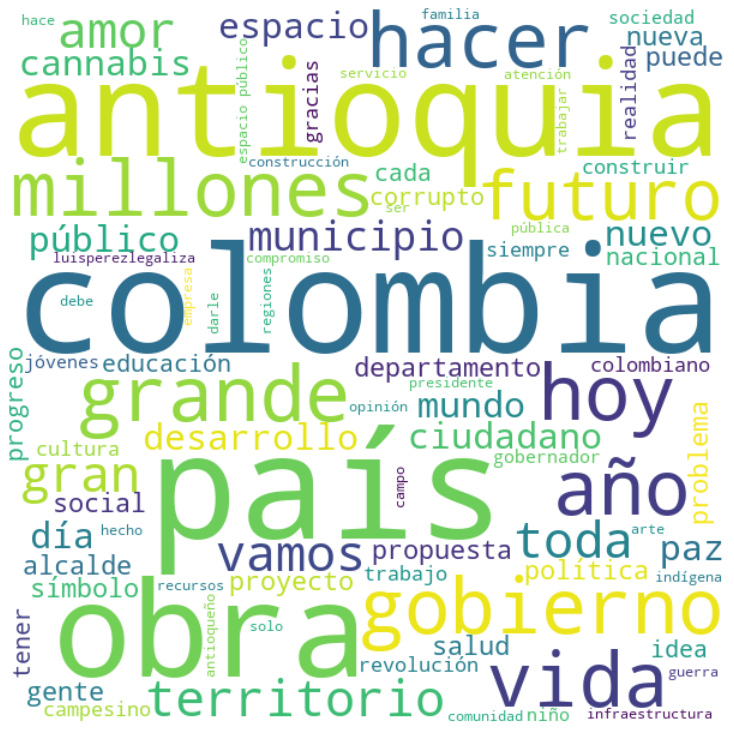

In [126]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Análisis de sentimientos

In [58]:
df = pd.concat([GP, FG, RH, SF, IB, EG, JM, LUPE])
#df = df.drop(columns=['fecha','fecha_dia'])
df.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1  RT @petrogustavo: Un camino por la vida https:...      0  2216      2022   
2  RT @PatriciaUribe07: Esta noche en  @NoticiasU...      0   590      2022   
3      Un camino por la vida https://t.co/3iWYRbzUVH   5744  2216      2022   
4  RT @PetroValleC: #Caravana 🚗🚲🛵 así vivimos la ...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         8   8/May  May/2022  8/May/2022  
4       May         8   8/May  May/2022  8/May/2022

In [60]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [61]:
df['tuit'] = df['tuit'].apply(clean_text)
df.head()

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1            : Un camino por la vida t.co/3iWYRbzUVH      0  2216      2022   
2  7: Esta noche en    Obispo de Quibdó urge diál...      0   590      2022   
3              Un camino por la vida t.co/3iWYRbzUVH   5744  2216      2022   
4  : Caravana 🚗🚲🛵 así vivimos la gran Petro Carav...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  
0       May         9   9/May  May/2022  9/May/2022  
1       May         9   9/May  May/2022  9/May/2022  
2       May         9   9/May  May/2022  9/May/2022  
3       May         8   8/May  May/2022  8/May/2022  
4       May         8   8/May  May/2022  8/May/2022

In [62]:
df['Subjetividad'] = df['tuit'].apply(get_subjectivity)
df['Polaridad'] = df['tuit'].apply(get_polarity)

df.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1            : Un camino por la vida t.co/3iWYRbzUVH      0  2216      2022   
2  7: Esta noche en    Obispo de Quibdó urge diál...      0   590      2022   
3              Un camino por la vida t.co/3iWYRbzUVH   5744  2216      2022   
4  : Caravana 🚗🚲🛵 así vivimos la gran Petro Carav...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  Subjetividad  Polaridad  
0       May         9   9/May  May/2022  9/May/2022      0.066667   0.033333  
1       May         9   9/May  May/2022  9/May/2022      0.000000   0.000000  
2       May         9   9/May  May/2022  9/May/2022      0.000000   0.000000  
3       May         8   8/May  May/2022  8/May/2022      0.000000   0.000000  
4       May         8   8/May  May/2022  8/May/2022      0.000000   0.000000

In [63]:
def sentimiento(valor):
    if valor < 0:
        return 'Negativo'
    elif valor > 0:
        return 'Positivo'
    else:
        'Neutral'

df['Sentimiento'] = df['Polaridad'].apply(sentimiento)

df.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 11:57:15+00:00   
1  petrogustavo 2022-05-09 00:45:26+00:00   
2  petrogustavo 2022-05-09 00:44:50+00:00   
3  petrogustavo 2022-05-08 23:35:57+00:00   
4  petrogustavo 2022-05-08 23:08:30+00:00   

                                                tuit  likes    rt fecha_ano  \
0  Criticar a la senadora  Isabel Zuleta por su l...   2105   772      2022   
1            : Un camino por la vida t.co/3iWYRbzUVH      0  2216      2022   
2  7: Esta noche en    Obispo de Quibdó urge diál...      0   590      2022   
3              Un camino por la vida t.co/3iWYRbzUVH   5744  2216      2022   
4  : Caravana 🚗🚲🛵 así vivimos la gran Petro Carav...      0   494      2022   

  fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  Subjetividad  Polaridad  \
0       May         9   9/May  May/2022  9/May/2022      0.066667   0.033333   
1       May         9   9/May  May/2022  9/May/2022      0.000000   0.000000   
2       May         9   9/May  May/2022  9/May/2022      0.000000   0.000000   
3       May         8   8/May  May/2022  8/May/2022      0.000000   0.000000   
4       May         8   8/May  May/2022  8/May/2022      0.000000   0.000000   

  Sentimiento  
0    Positivo  
1        None  
2        None  
3        None  
4        None

In [68]:
df.to_csv('candidatos.csv', sep=',')

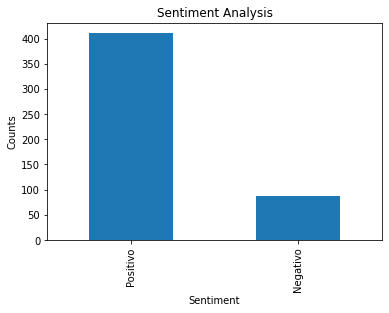

In [64]:
df['Sentimiento'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentimiento'].value_counts().plot(kind='bar')
plt.show()

In [67]:
fig = px.bar(df.dropna(subset=['Sentimiento']), x='Sentimiento', facet_col='candidato', facet_col_wrap=2, height=800, title='Tuits positivos y negativos por candidato', color='candidato', template='seaborn', text='Sentimiento', color_discrete_sequence=px.colors.qualitative.Antique[::-1])
fig.update_layout(legend_title_text='Candidato')
fig

In [69]:
fig = px.violin(df, x='candidato', y='Polaridad', color='candidato', height=400, title='Polaridad por candidato ', template='ggplot2')
fig

In [70]:
fig = px.scatter(df, x='Subjetividad', y='Polaridad', color='candidato', facet_row='candidato', height=1700, title='Subjetividad vs Polaridad de los tuits por Candidato', template='plotly_dark')
fig

In [143]:
fig = px.violin(df, x='candidato', y='Subjetividad', color='candidato', height=400, title='Polaridad por candidato ', template='ggplot2')
fig

# Nube de palabras tuits clasificados como negativos

In [146]:
df1 = df[df['Polaridad'] < 0]
df1.head(5)

candidato                     fecha  \
37   petrogustavo 2022-05-07 15:22:50+00:00   
61   petrogustavo 2022-05-06 14:21:27+00:00   
70   petrogustavo 2022-05-06 13:59:56+00:00   
521  petrogustavo 2022-04-13 21:25:14+00:00   
530  petrogustavo 2022-04-13 17:21:00+00:00   

                                                  tuit  likes    rt fecha_ano  \
37   Relaciones con la mafia. No lo duden, el abraz...  10314  3882      2022   
61   Mi solidaridad a todas las familias caribeñas....   6697  2431      2022   
70   Las bandas pueden entrar a procesos de sometim...   1334   534      2022   
521  La heredera del esclavismo critica a la herede...   2503   880      2022   
530  Nuestra apuesta en la reforma a la justicia qu...   1243   430      2022   

    fecha_mes fecha_dia   mes_dia     mes_ano          d_m_a  Subjetividad  \
37        May         7     7/May    May/2022     7/May/2022           1.0   
61        May         6     6/May    May/2022     6/May/2022           0.1   
70        May         6     6/May    May/2022     6/May/2022           1.0   
521     April        13  13/April  April/2022  13/April/2022           1.0   
530     April        13  13/April  April/2022  13/April/2022           1.0   

     Polaridad Sentimiento  
37        -0.8    Negativo  
61        -0.1    Negativo  
70        -0.8    Negativo  
521       -0.8    Negativo  
530       -0.8    Negativo

# Gustavo Petro

In [147]:
df_gp = df1[df1['candidato'] == 'petrogustavo']
df_gp.head(5)

candidato                     fecha  \
37   petrogustavo 2022-05-07 15:22:50+00:00   
61   petrogustavo 2022-05-06 14:21:27+00:00   
70   petrogustavo 2022-05-06 13:59:56+00:00   
521  petrogustavo 2022-04-13 21:25:14+00:00   
530  petrogustavo 2022-04-13 17:21:00+00:00   

                                                  tuit  likes    rt fecha_ano  \
37   Relaciones con la mafia. No lo duden, el abraz...  10314  3882      2022   
61   Mi solidaridad a todas las familias caribeñas....   6697  2431      2022   
70   Las bandas pueden entrar a procesos de sometim...   1334   534      2022   
521  La heredera del esclavismo critica a la herede...   2503   880      2022   
530  Nuestra apuesta en la reforma a la justicia qu...   1243   430      2022   

    fecha_mes fecha_dia   mes_dia     mes_ano          d_m_a  Subjetividad  \
37        May         7     7/May    May/2022     7/May/2022           1.0   
61        May         6     6/May    May/2022     6/May/2022           0.1   
70        May         6     6/May    May/2022     6/May/2022           1.0   
521     April        13  13/April  April/2022  13/April/2022           1.0   
530     April        13  13/April  April/2022  13/April/2022           1.0   

     Polaridad Sentimiento  
37        -0.8    Negativo  
61        -0.1    Negativo  
70        -0.8    Negativo  
521       -0.8    Negativo  
530       -0.8    Negativo

In [159]:
data_gp = ' '.join(item for item in df_gp.tuit)
#data_gp

In [160]:
words = word_tokenize(clean_text(data_gp)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español

In [161]:
words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [162]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'petro', 'Petro', 'petropresidente']
words = [w for w in words if not w in no_words and w.isalpha()]

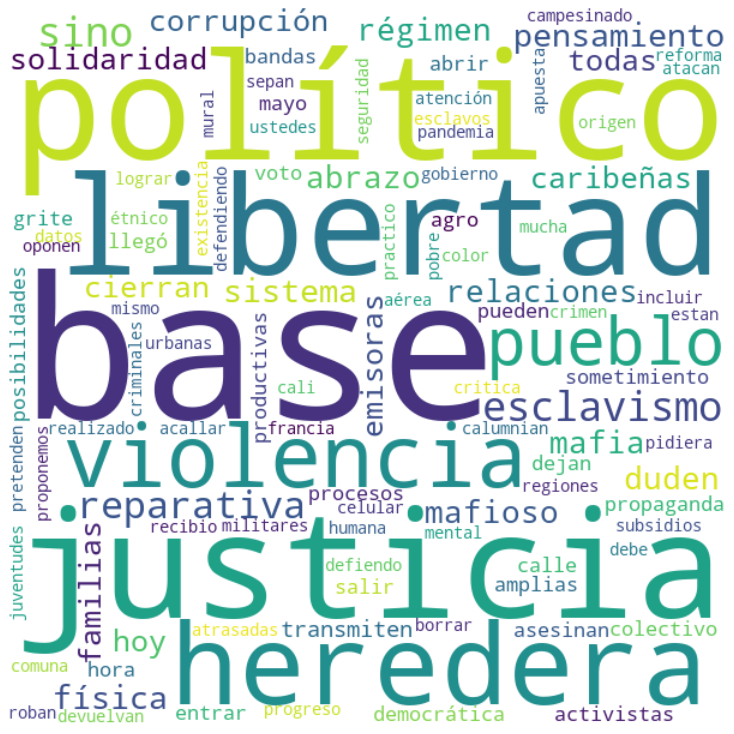

In [163]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Fico Gutierrez

In [148]:
df_fg = df1[df1['candidato'] == 'FicoGutierrez']
df_fg.head(5)

candidato                     fecha  \
31   FicoGutierrez 2022-05-07 15:19:22+00:00   
56   FicoGutierrez 2022-05-05 15:14:31+00:00   
80   FicoGutierrez 2022-05-02 14:27:52+00:00   
104  FicoGutierrez 2022-04-29 16:08:29+00:00   
260  FicoGutierrez 2022-04-18 18:18:51+00:00   

                                                  tuit  likes    rt fecha_ano  \
31   Petro dio la orden de infiltrar nuestra campañ...   8513  3826      2022   
56   Se aliaron con organización criminal para inte...  11026  4588      2022   
80   Hoy es el día internacional de la lucha contra...   6229  1541      2022   
104  Mi propuesta para la niñez: como lo hicimos en...   7330  2093      2022   
260  Ese tal “perdón social” es en realidad “el pac...   7196  2671      2022   

    fecha_mes fecha_dia   mes_dia     mes_ano          d_m_a  Subjetividad  \
31        May         7     7/May    May/2022     7/May/2022      0.550000   
56        May         5     5/May    May/2022     5/May/2022      0.550000   
80        May         2     2/May    May/2022     2/May/2022      0.200000   
104     April        29  29/April  April/2022  29/April/2022      0.200000   
260     April        18  18/April  April/2022  18/April/2022      0.308333   

     Polaridad Sentimiento  
31   -0.400000    Negativo  
56   -0.400000    Negativo  
80   -0.100000    Negativo  
104  -0.100000    Negativo  
260  -0.183333    Negativo

In [164]:
data_fg = ' '.join(item for item in df_fg.tuit)
#data_fg

In [165]:
words = word_tokenize(clean_text(data_fg)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [166]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
            'forolr', 'Fico', 'fico', 'FicoGutierrez', 'ficopresidente']
words = [w for w in words if not w in no_words and w.isalpha()]

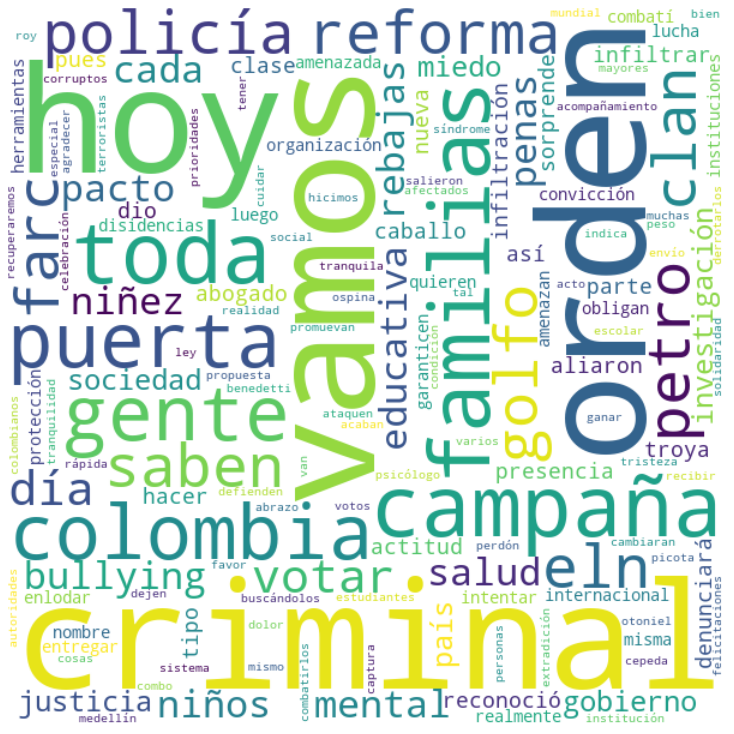

In [167]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Rodolfo Hernández

In [149]:
df_rh = df1[df1['candidato'] == 'ingrodolfohdez']
df_rh.head(5)

candidato                     fecha  \
13   ingrodolfohdez 2022-05-09 01:25:17+00:00   
35   ingrodolfohdez 2022-05-05 16:17:16+00:00   
193  ingrodolfohdez 2022-04-22 17:32:23+00:00   
299  ingrodolfohdez 2022-04-07 17:04:59+00:00   
439  ingrodolfohdez 2022-01-25 16:30:20+00:00   

                                                  tuit  likes    rt fecha_ano  \
13   Colombia podría ser un paraíso donde todos los...    104    22      2022   
35   Para dejarlo claro: Sin duda, hay gente como O...  14930  2858      2022   
193  Si usted inyecta plata en la base, la economía...     49    12      2022   
299  Propuestas como la del trabajo por horas que h...    529   118      2022   
439  La base de mi campaña será sacar a todos los l...     59     9      2022   

    fecha_mes fecha_dia     mes_dia       mes_ano            d_m_a  \
13        May         9       9/May      May/2022       9/May/2022   
35        May         5       5/May      May/2022       5/May/2022   
193     April        22    22/April    April/2022    22/April/2022   
299     April         7     7/April    April/2022     7/April/2022   
439   January        25  25/January  January/2022  25/January/2022   

     Subjetividad  Polaridad Sentimiento  
13           1.00       -0.8    Negativo  
35           0.55       -0.4    Negativo  
193          1.00       -0.8    Negativo  
299          0.20       -0.1    Negativo  
439          1.00       -0.8    Negativo

In [209]:
data_rh = ' '.join(item for item in df_rh.tuit)
#data_rh

In [210]:
words = word_tokenize(clean_text(data_rh)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [211]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'rodolfopresidente', 'rodolfohernandez', 'ligaanticorrupcion', 'rodolfo hernández', 'ingrodolfo','hable ingeniero',
           'ingeniero', 'rodolfo', 'hernández']
words = [w for w in words if not w in no_words and w.isalpha()]

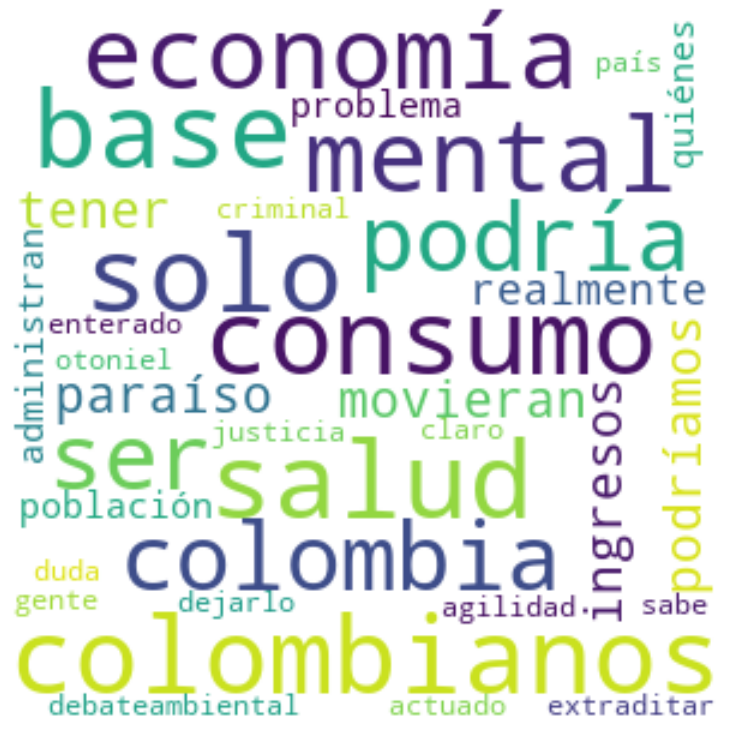

In [212]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 300, height = 300, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Sergio Fajardo

In [150]:
df_sf = df1[df1['candidato'] == 'sergio_fajardo']
df_sf.head(5)

candidato                     fecha  \
243  sergio_fajardo 2022-05-01 01:40:59+00:00   
334  sergio_fajardo 2022-04-28 23:21:30+00:00   
348  sergio_fajardo 2022-04-28 16:18:59+00:00   
356  sergio_fajardo 2022-04-28 11:45:13+00:00   
435  sergio_fajardo 2022-04-26 23:06:15+00:00   

                                                  tuit  likes   rt fecha_ano  \
243  Detrás de la deforestación están las bandas cr...    134   43      2022   
334  Vamos a ajustar los subsidios a las familias m...    123   38      2022   
348  El derecho de autor es una de la base de la pr...     93   27      2022   
356  Egan es un ejemplo extraordinario de fortaleza...   1869  291      2022   
435  La corrupción ha sido una de mis luchas centra...    390  167      2022   

    fecha_mes fecha_dia   mes_dia     mes_ano          d_m_a  Subjetividad  \
243       May         1     1/May    May/2022     1/May/2022          0.55   
334     April        28  28/April  April/2022  28/April/2022          1.00   
348     April        28  28/April  April/2022  28/April/2022          1.00   
356     April        28  28/April  April/2022  28/April/2022          0.20   
435     April        26  26/April  April/2022  26/April/2022          0.55   

     Polaridad Sentimiento  
243       -0.4    Negativo  
334       -0.8    Negativo  
348       -0.8    Negativo  
356       -0.1    Negativo  
435       -0.4    Negativo

In [205]:
data_sf = ' '.join(item for item in df_sf.tuit)
#data_sf

In [206]:
words = word_tokenize(clean_text(data_sf)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [207]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'lavueltacaribe', 'remontada', 'fajardo', 'fajardopresidente', 'unidasconfajardo', 'cambiemosconfajardo']
words = [w for w in words if not w in no_words and w.isalpha()]

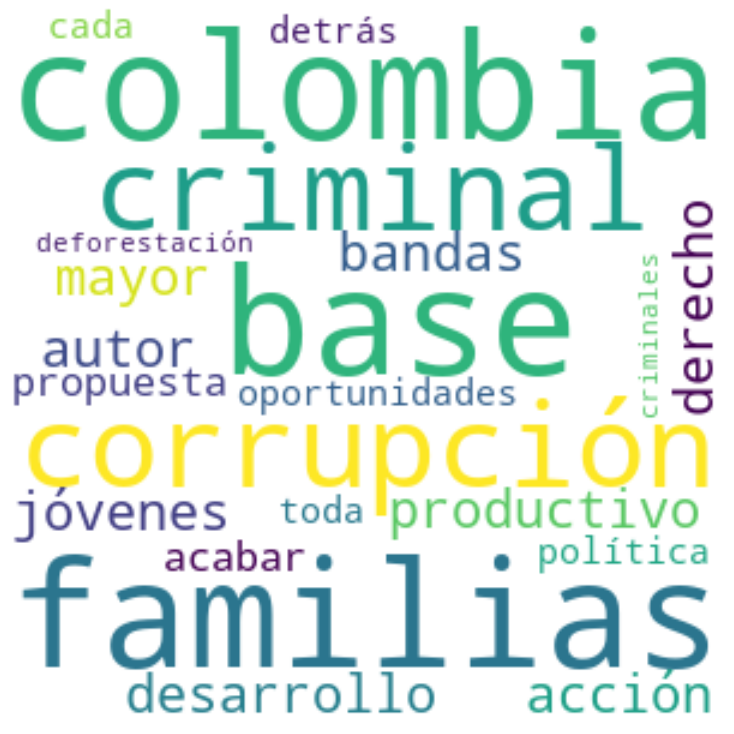

In [208]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 300, height = 300, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Ingrid Betancourt

In [151]:
df_ib = df1[df1['candidato'] == 'IBetancourtCol']
df_ib.head(5)

candidato                     fecha  \
26   IBetancourtCol 2022-04-29 14:56:44+00:00   
98   IBetancourtCol 2022-04-12 13:28:05+00:00   
183  IBetancourtCol 2022-03-29 15:38:58+00:00   
242  IBetancourtCol 2022-03-25 02:05:17+00:00   
273  IBetancourtCol 2022-03-22 14:07:12+00:00   

                                                  tuit  likes  rt fecha_ano  \
26   La salud mental en Colombia es un tema que nec...    105  23      2022   
98   : ((Al Aire)) ConsejoTA  |  Hoy nos acompaña e...      0   1      2022   
183  EN DEBATE en \n\nEn el tema de salud mental va...     31   1      2022   
242  : "Hay una cosa que es muy violenta y es la di...      0   7      2022   
273  EN DEBATE con   \n\nEs necesario redistribuir ...     11   0      2022   

    fecha_mes fecha_dia   mes_dia     mes_ano          d_m_a  Subjetividad  \
26      April        29  29/April  April/2022  29/April/2022           0.2   
98      April        12  12/April  April/2022  12/April/2022           1.0   
183     March        29  29/March  March/2022  29/March/2022           0.2   
242     March        25  25/March  March/2022  25/March/2022           0.2   
273     March        22  22/March  March/2022  22/March/2022           0.5   

     Polaridad Sentimiento  
26       -0.10    Negativo  
98       -0.75    Negativo  
183      -0.10    Negativo  
242      -0.10    Negativo  
273      -0.50    Negativo

In [201]:
data_ib = ' '.join(item for item in df_ib.tuit)
#data_ib

In [202]:
words = word_tokenize(clean_text(data_ib)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [203]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'ingrid', 'betancourt', 'ingridpresidenta', 'elexternadodebate', 'jaquealacorrupcion']
words = [w for w in words if not w in no_words and w.isalpha()]

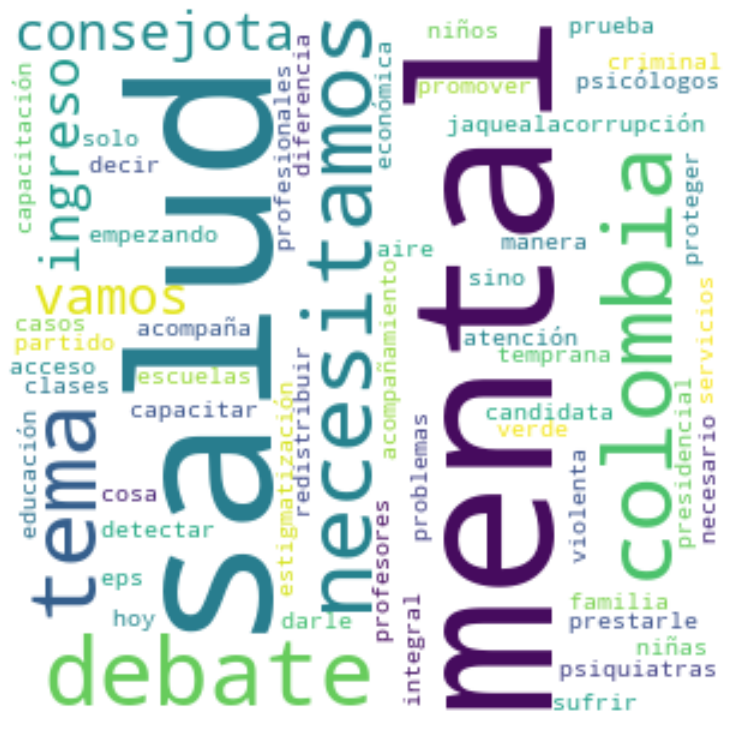

In [204]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 300, height = 300, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Enrique Gómez

In [152]:
df_eg = df1[df1['candidato'] == 'Enrique_GomezM']
df_eg.head(5)

candidato                     fecha  \
129  Enrique_GomezM 2022-04-30 16:46:34+00:00   
146  Enrique_GomezM 2022-04-29 14:54:03+00:00   
286  Enrique_GomezM 2022-04-22 17:59:55+00:00   
313  Enrique_GomezM 2022-04-22 01:29:05+00:00   
330  Enrique_GomezM 2022-04-21 02:04:45+00:00   

                                                  tuit  likes    rt fecha_ano  \
129  Sin seguridad como base transversal, no hay de...    154    88      2022   
146  El sistema de salud de Colombia cubre el 55% d...     69    35      2022   
286   Juan te invito a que revises el programa: rea...     26     4      2022   
313  Cuidar la democracia es un deber de todos, ayú...    348   165      2022   
330  Como nación, como sociedad, no podemos permiti...   3707  1924      2022   

    fecha_mes fecha_dia   mes_dia     mes_ano          d_m_a  Subjetividad  \
129     April        30  30/April  April/2022  30/April/2022          1.00   
146     April        29  29/April  April/2022  29/April/2022          0.20   
286     April        22  22/April  April/2022  22/April/2022          0.65   
313     April        22  22/April  April/2022  22/April/2022          0.55   
330     April        21  21/April  April/2022  21/April/2022          0.55   

     Polaridad Sentimiento  
129       -0.8    Negativo  
146       -0.1    Negativo  
286       -0.3    Negativo  
313       -0.4    Negativo  
330       -0.4    Negativo

In [197]:
data_eg = ' '.join(item for item in df_eg.tuit)
#data_eg

In [198]:
words = word_tokenize(clean_text(data_eg)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [199]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'salvacion nacional', 'salvacion', 'nacional', 'salvación', 'eldebatepacifico', 'enrique gomez', 'enrique', 'gomez',
           'gómez', 'enrique gómez', 'eldebatedelpacífico']
words = [w for w in words if not w in no_words and w.isalpha()]

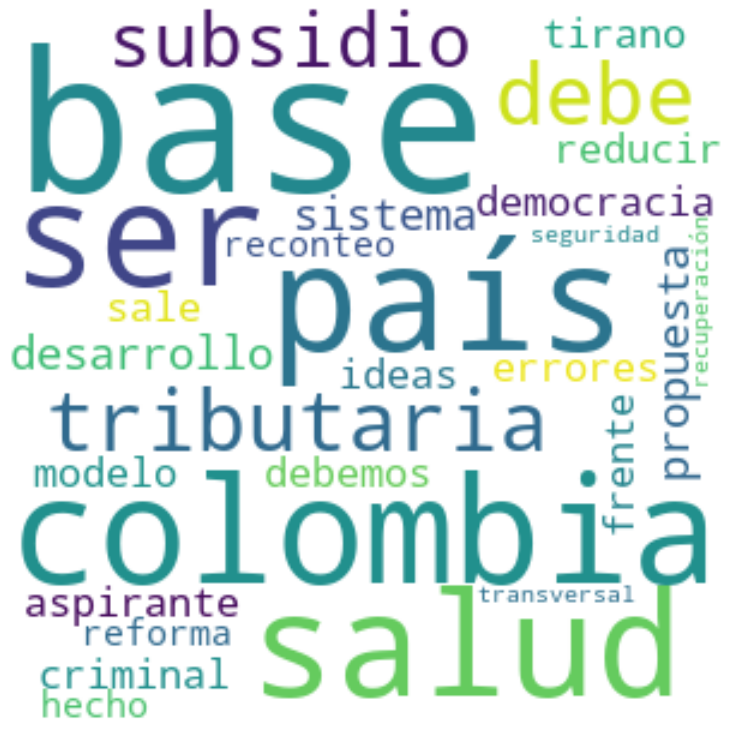

In [200]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 300, height = 300, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# John Milton

In [153]:
df_jm = df1[df1['candidato'] == 'JohnMiltonR_']
df_jm.head(5)

candidato                     fecha  \
25   JohnMiltonR_ 2022-05-08 14:36:36+00:00   
134  JohnMiltonR_ 2022-05-07 11:40:49+00:00   
226  JohnMiltonR_ 2022-05-05 11:25:17+00:00   
246  JohnMiltonR_ 2022-05-04 10:01:32+00:00   
249  JohnMiltonR_ 2022-05-04 00:23:50+00:00   

                                                  tuit  likes  rt fecha_ano  \
25   Hoy celebramos a aquellas colombianas que se l...     61  22      2022   
134  _co: EsLaEconomíaEstúpido | La disminución del...      0   9      2022   
226  OtonielEs la evidencia que con pantalones bien...    144  36      2022   
246  Con base en lo que se anuncia en la corte supr...    280  73      2022   
249  Rechazo cualquier amenaza y plan criminal en c...    222  32      2022   

    fecha_mes fecha_dia mes_dia   mes_ano       d_m_a  Subjetividad  \
25        May         8   8/May  May/2022  8/May/2022          1.00   
134       May         7   7/May  May/2022  7/May/2022          1.00   
226       May         5   5/May  May/2022  5/May/2022          0.55   
246       May         4   4/May  May/2022  4/May/2022          1.00   
249       May         4   4/May  May/2022  4/May/2022          0.55   

     Polaridad Sentimiento  
25        -0.8    Negativo  
134       -0.8    Negativo  
226       -0.4    Negativo  
246       -0.8    Negativo  
249       -0.4    Negativo

In [193]:
data_jm = ' '.join(item for item in df_jm.tuit)
#data_jm

In [194]:
words = word_tokenize(clean_text(data_jm)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [195]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'john', 'milton', 'rodriguez', 'rodríguez', 'john milton', 'johnmiltonpresidenteva', 'johnmiltonpresidente', 'envivo',
           'alaire', 'forolr']
words = [w for w in words if not w in no_words and w.isalpha()]

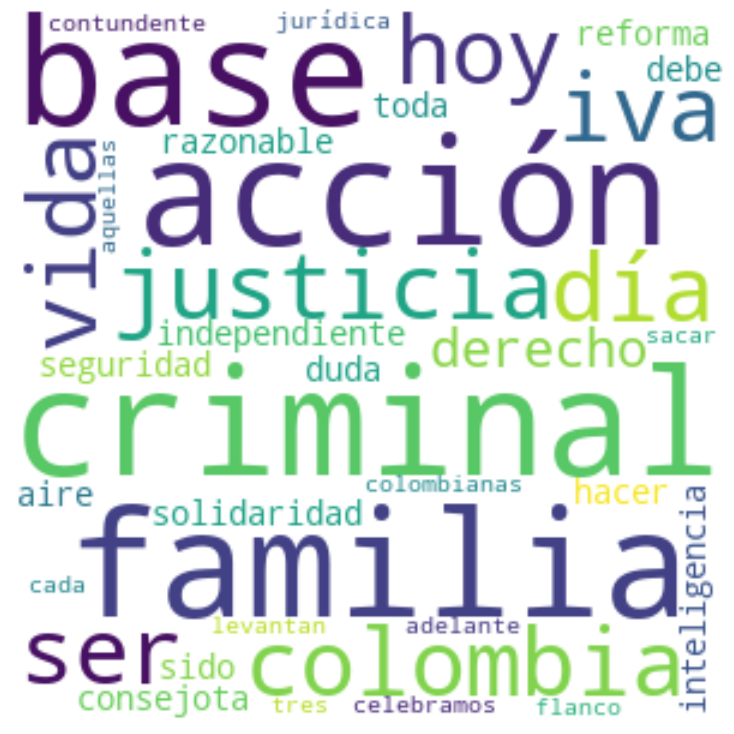

In [196]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 300, height = 300, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Luis Pérez

In [154]:
df_lupe = df1[df1['candidato'] == 'Luis_Perez_G']
df_lupe.head(5)

candidato                     fecha  \
1    Luis_Perez_G 2022-05-06 17:22:28+00:00   
51   Luis_Perez_G 2022-04-28 21:53:17+00:00   
120  Luis_Perez_G 2022-04-11 23:25:12+00:00   
123  Luis_Perez_G 2022-04-11 23:25:11+00:00   
390  Luis_Perez_G 2021-11-08 15:41:15+00:00   

                                                  tuit  likes  rt fecha_ano  \
1    El clan del golfo tiene en jaque a 9 departame...     33   9      2022   
51   A Colombia la enloquecieron los extremos polít...      8   3      2022   
120  Ante la brutal masacre del gobierno en el Putu...      6   6      2022   
123  Todo NO se vale en la guerra ni el amor. \nLa ...     69  19      2022   
390  : Opinión \nEl salario miserable de los Ediles...      0   8      2021   

    fecha_mes fecha_dia     mes_dia        mes_ano            d_m_a  \
1         May         6       6/May       May/2022       6/May/2022   
51      April        28    28/April     April/2022    28/April/2022   
120     April        11    11/April     April/2022    11/April/2022   
123     April        11    11/April     April/2022    11/April/2022   
390  November         8  8/November  November/2021  8/November/2021   

     Subjetividad  Polaridad Sentimiento  
1            0.55     -0.400    Negativo  
51           0.55     -0.625    Negativo  
120          1.00     -0.875    Negativo  
123          1.00     -0.875    Negativo  
390          1.00     -1.000    Negativo

In [188]:
data_lupe = ' '.join(item for item in df_lupe.tuit)
#data_lupe

In [189]:
words = word_tokenize(clean_text(data_lupe)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
#print(words)

In [190]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si',
           'luis', 'perez', 'pérez', 'luis perez', 'luis pérez', 'luispérezpresidente', 'cumplelapalabra', 'piensaengrande']
words = [w for w in words if not w in no_words and w.isalpha()]

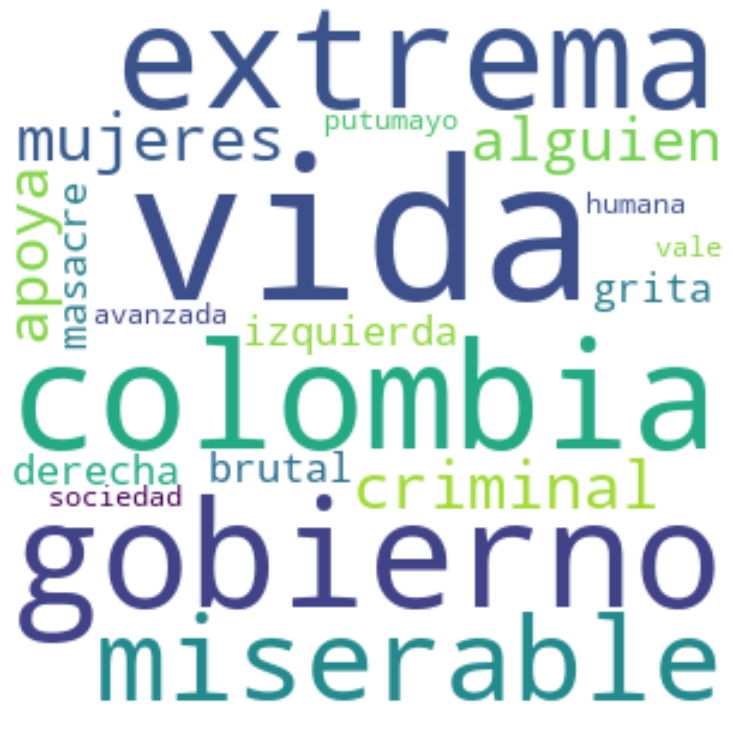

In [192]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 300, height = 300, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()